## **4.2 - Estrutura de um Backtest**

### **Dados históricos: fontes, limpeza e preparação**

### **4.2.1 - Dados Históricos: Fontes, Limpeza e Preparação (Guia de Boas Práticas)**

A preparação dos dados é a etapa mais trabalhosa e crítica de um backtest. A máxima "lixo entra, lixo sai" nunca foi tão verdadeira. Um backtest, por mais sofisticado que seja, produzirá resultados inúteis se for alimentado com dados de má qualidade. Siga este guia para garantir a integridade da sua análise.

#### **1. Fontes e Proveniência dos Dados**

Antes de qualquer coisa, é fundamental entender profundamente os dados que você está utilizando.

* **Definição e Dicionário de Dados:** O que cada coluna significa exatamente? O "volume" inclui negociações de leilão? O "preço de fechamento" é o da última negociação ou uma média ponderada? Exija sempre um dicionário de dados claro do seu fornecedor.
* **Proveniência dos Dados:** É essencial saber a origem da informação.
    * O fornecedor coleta os dados diretamente ou os compra de outra fonte?
    * A coleta é exaustiva, cobrindo todo o universo de negociações, ou é baseada em uma amostragem? Se for uma amostragem, a metodologia é estatisticamente sólida?
* **Tipos de Fontes:**
    * **Fontes Gratuitas (Ex: Yahoo Finance, APIs de corretoras):** Ótimas para aprendizado e testes preliminares. O custo é zero, mas a qualidade pode variar, exigindo um esforço maior de limpeza e validação. CUIDADO PRA NÃO SER BANIDO, mas caso seja, eu fiz upload dos dados da S&P de 2019 a 2024 no git, [link](https://github.com/LorenzoC5/SP500DATA)
    * **Fornecedores Pagos (Ex: Bloomberg, Refinitiv, provedores de dados locais):** Essenciais para trabalho profissional. Oferecem dados mais limpos, ajustados e com maior garantia de qualidade, além de dados fundamentalistas e alternativos. Nosso sonho é fazer uma parceria com um desses, mas tá difícil.

#### **2. Limpeza e Validação de Qualidade**

Nunca presuma que os dados estão perfeitos. Um processo de validação é obrigatório.

* **Análise de Dados Faltantes (Missingness Analysis):** É raro uma série de dados ser 100% completa. Investigue os "buracos":
    * **Quando e Onde?** Os dados faltam em dias específicos (feriados que não foram tratados?), para ativos específicos (baixa liquidez?) ou de forma aleatória? Às vezes, a própria ausência de um dado pode ser informativa.
    * **Tratamento:**
        * **Preenchimento para a Frente (`forward-fill`):** Usa o último valor válido. Adequado para preços em dias sem negociação.
        * **Interpolação Linear:** Cria um valor intermediário. Pode ser útil, mas deve ser usado com cuidado para não criar padrões falsos.
        * **Remoção:** Se um ativo tem muitos dados faltantes, pode ser mais seguro removê-lo da análise para não comprometer o resultado.
        * Muitas vezes se vc trabalhar com classes de ativos diferentes as análises podem ser enganosas por conta de variações em calendários, por exemplo, criptos em geral são tradados 24/7 mas IBOV só em dias úteis com horáríos bem definidos, apesar de termos preços de fechamento para IBOV nos finais de semana, considerar esses dias na análise é errado pois não há como operar nesses dias. O mesmo vale para análises internacionais, feriados no Brasil são diferentes dos EUA, é importantíssimo prestar atenção nisso, erros costumam ser bem comuns, CUIDADO!
* **Detecção de Outliers e Erros:** Procure por valores anômalos que podem ser erros de digitação ou de transmissão. Uma ação não varia 10.000% em um dia. Use métodos estatísticos (como Z-score ou desvios em relação à média móvel) para sinalizar esses pontos para investigação manual. Isso é mais raro, mas provedores como yfinance costumam demorar algumas horas pra reestruturar os dados quando ocorrem diluições de uma ação e isso causa esse tipo de erro.
* **Detecção de Pontos de Mudança (Change Point Detection):** Às vezes, um fornecedor de dados pode alterar a metodologia de cálculo de um indicador no meio da série histórica. Ferramentas de detecção de pontos de mudança podem ajudar a identificar essas quebras estruturais, que podem invalidar análises que pressupõem consistência ao longo do tempo.

#### **3. Preparação e Ajustes para o Mundo Real**

Depois de limpos, os dados precisam ser ajustados para refletir a realidade do mercado e evitar o viés de olhar para o futuro (*look-ahead bias*).

* **Ajuste por Eventos Corporativos (Dividendos e Desdobramentos):**
    *  Um desdobramento (split) de ações ou um pagamento de dividendo causa uma queda no preço que não representa uma perda real de valor para o investidor. Um backtest ingênuo interpretaria isso como um sinal de venda ou uma performance negativa.
    *  Em vez de usar preços pré-ajustados (que podem vazar informação futura de forma sutil), a melhor prática é usar os preços brutos (não ajustados) e uma coluna separada com um "fator de ajuste". Para calcular os retornos, você aplica o fator de ajuste ao preço do dia anterior, garantindo que a comparação seja justa e livre de distorções.
* **Dados "Point-in-Time":**
    * Este é um dos erros mais graves, principalmente para modelos que usam dados contábeis. Imagine que uma empresa publicou seu balanço do 4º trimestre em 31 de dezembro, mas só divulgou os números ao mercado em 15 de fevereiro do ano seguinte. Se o seu backtest usar os dados do balanço em uma data de janeiro, ele está operando com informações que eram impossíveis de se conhecer naquela época. O mesmo vale para dados econômicos que são revisados meses depois.
    * Use dados estritamente "point-in-time". Isso significa que cada dado em seu sistema deve ter duas datas: a data de referência (ex: 31/12) e a data em que se tornou publicamente conhecido (ex: 15/02). Seu backtest só pode usar informações cuja data de conhecimento seja anterior ou igual à data da simulação. Para dados financeiros, uma prática robusta é sempre usar os dados com uma defasagem para garantir que já foram publicados.
* **Transformações e Criação de Features:**
    * **Retornos:** Em vez de usar preços, a maioria dos modelos usa retornos (aritméticos ou logarítmicos), que possuem propriedades estatísticas mais estáveis.
    * **Normalização:** Features como volume de negociação ou valor de mercado podem variar muito entre empresas. Normalizá-las (ex: usando z-score) permite que sejam comparadas de forma justa.
    * **Estacionariedade:** Muitas séries de preços não são estacionárias (suas propriedades estatísticas mudam com o tempo). Transformações como a diferenciação ou o cálculo de retornos ajudam a torná-las mais adequadas para modelos estatísticos.

### **Tipos de backtest**


O backtest orientado a eventos e o backtest vetorizado são as duas principais abordagens para simular estratégias de trading. Eles chegam ao mesmo resultado, mas de maneiras fundamentalmente diferentes, cada um com suas próprias vantagens e desvantagens.

---

### Backtest Vetorizado (Vectorized Backtesting)

O backtest vetorizado é a abordagem mais rápida e simples, ideal para estratégias que não exigem lógica complexa. Ele utiliza o poder da computação em arrays (vetores e matrizes), com bibliotecas como NumPy e Pandas em Python, para processar todos os dados históricos de uma só vez.

#### Como Funciona?

Ele opera aplicando uma fórmula a uma coluna inteira de dados de uma vez, em vez de processar linha por linha.

1.  **Preparação dos Dados**: Todos os dados necessários (preços, indicadores como médias móveis, etc.) são pré-calculados e alinhados em grandes vetores ou matrizes.
2.  **Geração de Sinais em Lote**: A lógica de negociação é aplicada a todo o conjunto de dados de uma vez para gerar um vetor de sinais (ex: um vetor com `1` para comprar, `-1` para vender e `0` para manter).
3.  **Cálculo de Retornos**: Os retornos da estratégia são calculados multiplicando o vetor de posições (derivado dos sinais) pelo vetor de retornos do ativo.

#### Vantagens e Desvantagens

* **Vantagens**:
    * **Extremamente Rápido**: Como evita loops e utiliza operações otimizadas, é muito mais veloz que a abordagem orientada a eventos.
    * **Simplicidade de Código**: Para estratégias simples, o código é geralmente mais curto e conciso.
* **Desvantagens**:
    * **Viés de Olhar para o Futuro (Look-Ahead Bias)**: É muito fácil, e perigoso, cometer erros onde o cálculo de um sinal em um ponto do tempo acidentalmente usa dados do futuro, invalidando o teste.
    * **Inflexibilidade**: É muito difícil simular cenários realistas como ordens de stop-loss/take-profit, alocação de portfólio dinâmica, custos de transação variáveis ou estratégias que dependem do estado atual da carteira.

---

### Backtest Orientado a Eventos (Event-Driven Backtesting)

O backtest orientado a eventos é uma simulação muito mais realista e flexível, que imita como um sistema de trading operaria na vida real. Ele processa os dados históricos de forma sequencial, um "evento" de cada vez.

#### Como Funciona?

Ele opera dentro de um loop, geralmente chamado de "event loop", que processa os eventos em ordem cronológica.

1.  **Fila de Eventos**: O sistema começa com uma fila de eventos, geralmente "eventos de mercado" (um novo tick de preço, uma nova barra de negociação).
2.  **Processamento Sequencial**: O loop pega o próximo evento da fila (ex: o preço da PETR4 às 10:01).
3.  **Geração de Sinais**: Esse novo dado de mercado é enviado ao módulo da estratégia, que decide se gera um "evento de sinal" (comprar ou vender) com base em suas regras.
4.  **Gerenciamento de Ordens**: Se um sinal é gerado, ele se torna um "evento de ordem" (ex: "comprar 100 ações de PETR4 a mercado").
5.  **Execução e Preenchimento**: O "simulador de corretora" processa a ordem e gera um "evento de preenchimento", confirmando que a ordem foi executada a um determinado preço e calculando os custos.
6.  **Atualização do Portfólio**: O módulo de portfólio recebe o evento de preenchimento e atualiza o estado atual da carteira (posições, caixa, valor total).

Esse ciclo se repete para cada barra de dados, dia a dia, minuto a minuto.

#### Vantagens e Desvantagens

* **Vantagens**:
    * **Realismo e Flexibilidade**: É a forma mais próxima de simular o trading real. Permite modelar com facilidade lógicas complexas, como diferentes tipos de ordens, gerenciamento de risco dinâmico e estratégias de portfólio complexas.
    * **Menor Risco de Look-Ahead Bias**: Como os dados são processados sequencialmente, é muito mais difícil usar acidentalmente informações do futuro.
* **Desvantagens**:
    * **Lentidão**: Por operar em um loop `for`, processando um evento de cada vez, é significativamente mais lento que a abordagem vetorizada.
    * **Complexidade de Implementação**: A arquitetura é mais complexa e exige a construção de vários componentes que interagem entre si (gerador de eventos, estratégia, gerenciador de ordens, etc.).

---

### Tabela Comparativa

| Característica | Backtest Vetorizado | Backtest Orientado a Eventos |
| :--- | :--- | :--- |
| **Velocidade** | ⚡ Muito Rápido | 🐢 Lento |
| **Realismo** | Baixo | Alto |
| **Flexibilidade** | Baixa (difícil para lógicas complexas) | Alta (suporta qualquer tipo de lógica) |
| **Risco de Look-ahead** | Alto (fácil de cometer erros) | Baixo (arquitetura previne erros) |
| **Complexidade do Código**| Baixa para estratégias simples | Alta (requer uma arquitetura completa) |
| **Ideal Para** | Testes rápidos de ideias simples, fatores | Estratégias complexas, simulação de portfólio, HFT |

### Conclusão: Qual Usar?

Não há uma abordagem "melhor", mas sim a mais adequada para cada tarefa.

* Use o **backtest vetorizado** para testes rápidos e exploração inicial de ideias simples (ex: "será que comprar ações com P/L baixo funciona?"). Sua velocidade é imbatível para varrer um grande número de hipóteses.
* Use o **backtest orientado a eventos** para validar seriamente uma estratégia promissora, simular um portfólio completo com gerenciamento de risco real e garantir que sua lógica funcione como esperado em um ambiente que imita a produção.

Vamos agora fazer um backtest vetorizado para aprender, estude o código abaixo(ele está bastante comentado para ser bem didático).

<timed exec>:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed

Baixando dados para PETR4.SA...
Dados baixados com sucesso!

Calculando performance...

--- RESULTADOS FINAIS ---
Período Analisado: 2020-03-16 a 2024-12-30

Estratégia de Médias Móveis (100% Vetorizado):
  - Capital Final: R$201,868.10
  - Retorno Total: 101.87%

Estratégia Comprar e Segurar (Buy and Hold):
  - Capital Final: R$864,496.29
  - Retorno Total: 764.50%


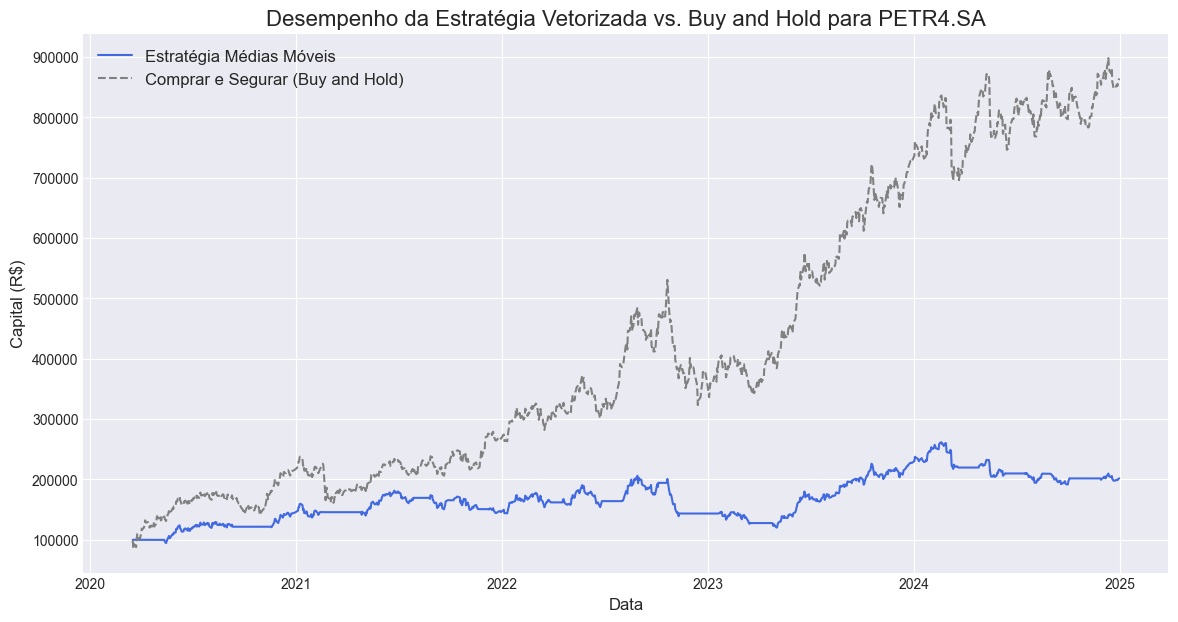

CPU times: total: 328 ms
Wall time: 341 ms


In [3]:
%%time
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# --- 1. Configurações Iniciais e Coleta de Dados ---

# Definições da Estratégia e do Backtest
ticker = 'PETR4.SA'
data_inicio = '2020-01-01'
data_fim = '2024-12-31'
capital_inicial = 100000.0
taxa_corretagem = 0.001

# Parâmetros da estratégia
media_curta = 21
media_longa = 50

# Baixando os dados históricos reais
print(f"Baixando dados para {ticker}...")
dados = yf.download(ticker, start=data_inicio, end=data_fim)

if dados.empty:
    print("Nenhum dado foi baixado. Verifique o ticker ou o período.")
else:
    print("Dados baixados com sucesso!")

    # --- 2. Preparação dos Dados e Geração de Sinais (VETORIZADO) ---

    df = pd.DataFrame(dados['Close'])
    df.columns = ['Preco']

    # Cálculo das Médias Móveis Simples
    df['MMS_Curta'] = df['Preco'].rolling(window=media_curta).mean()
    df['MMS_Longa'] = df['Preco'].rolling(window=media_longa).mean()

    # Remove os períodos iniciais com valores NaN
    df.dropna(inplace=True)

    # Cria a coluna de "posição desejada": 1 se a média curta está acima da longa, 0 caso contrário.
    # Usar 0 (em caixa) em vez de -1 (vendido) simplifica os cálculos de retorno.
    df['Posicao_Desejada'] = np.where(df['MMS_Curta'] > df['MMS_Longa'], 1, 0)

    # A posição real que teremos no dia é baseada na decisão do dia ANTERIOR.
    # Usamos .shift(1) para deslocar os sinais um dia para a frente.
    # Isso garante que não estamos usando informações do futuro (look-ahead bias).
    df['Posicao_Real'] = df['Posicao_Desejada'].shift(1)

    # Remove o primeiro NaN gerado pelo .shift()
    df.dropna(inplace=True)

    # --- 3. Cálculo de Retornos e Custos (VETORIZADO) ---

    # Calcula o retorno diário do próprio ativo
    df['Retorno_Ativo'] = df['Preco'].pct_change()

    # O retorno da nossa estratégia é o retorno do ativo multiplicado pela nossa posição no dia.
    # Se a posição for 1 (comprado), o retorno é o do ativo.
    # Se a posição for 0 (em caixa), o retorno é zero.
    df['Retorno_Estrategia'] = df['Retorno_Ativo'] * df['Posicao_Real']

    # Calcula os custos de transação
    # Uma transação ocorre sempre que a posição real muda (de 0 para 1 ou de 1 para 0)
    # .diff().abs() nos dá 1 nos dias de transação e 0 nos outros.
    trades = df['Posicao_Real'].diff().abs()
    df['Custos'] = trades * taxa_corretagem

    # Subtrai os custos do retorno da estratégia para obter o retorno líquido
    df['Retorno_Estrategia_Liquido'] = df['Retorno_Estrategia'] - df['Custos']


    # --- 4. Análise de Resultados (VETORIZADO) ---

    print("\nCalculando performance...")

    # Calcula a curva de capital usando o produto cumulativo dos retornos diários
    df['Capital_Estrategia'] = capital_inicial * (1 + df['Retorno_Estrategia_Liquido']).cumprod()
    df['Capital_BuyAndHold'] = capital_inicial * (1 + df['Retorno_Ativo']).cumprod()

    # Métricas Finais
    capital_final_estrategia = df['Capital_Estrategia'].iloc[-1]
    retorno_total_estrategia = (capital_final_estrategia / capital_inicial - 1) * 100
    
    capital_final_buyhold = df['Capital_BuyAndHold'].iloc[-1]
    retorno_total_buyhold = (capital_final_buyhold / capital_inicial - 1) * 100
    
    print("\n--- RESULTADOS FINAIS ---")
    print(f"Período Analisado: {df.index.min().date()} a {df.index.max().date()}")
    print("\nEstratégia de Médias Móveis (100% Vetorizado):")
    print(f"  - Capital Final: R${capital_final_estrategia:,.2f}")
    print(f"  - Retorno Total: {retorno_total_estrategia:.2f}%")
    
    print("\nEstratégia Comprar e Segurar (Buy and Hold):")
    print(f"  - Capital Final: R${capital_final_buyhold:,.2f}")
    print(f"  - Retorno Total: {retorno_total_buyhold:.2f}%")

    # --- 5. Visualização Gráfica ---

    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 7))
    plt.plot(df['Capital_Estrategia'], label='Estratégia Médias Móveis', color='royalblue')
    plt.plot(df['Capital_BuyAndHold'], label='Comprar e Segurar (Buy and Hold)', color='gray', linestyle='--')

    plt.title(f'Desempenho da Estratégia Vetorizada vs. Buy and Hold para {ticker}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Capital (R$)', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

Agora um Backtest Orientado a eventos!

Baixando dados...
Dados baixados com sucesso!

Iniciando simulação do backtest (Orientado a Eventos)...
SINAL: LONG para PETR4.SA em 2020-05-11
  > ORDEM EXECUTADA: BUY 5509 ações de PETR4.SA a R$18.15
SINAL: EXIT para PETR4.SA em 2020-09-10
  > ORDEM EXECUTADA: SELL 5509.0 ações de PETR4.SA a R$22.12
SINAL: LONG para PETR4.SA em 2020-11-17
  > ORDEM EXECUTADA: BUY 5135 ações de PETR4.SA a R$23.69
SINAL: EXIT para PETR4.SA em 2021-02-12
  > ORDEM EXECUTADA: SELL 5135.0 ações de PETR4.SA a R$28.44
SINAL: LONG para PETR4.SA em 2021-04-28
  > ORDEM EXECUTADA: BUY 6089 ações de PETR4.SA a R$23.94
SINAL: EXIT para PETR4.SA em 2021-07-28
  > ORDEM EXECUTADA: SELL 6089.0 ações de PETR4.SA a R$27.71
SINAL: LONG para PETR4.SA em 2021-09-02
  > ORDEM EXECUTADA: BUY 6331 ações de PETR4.SA a R$26.60
SINAL: EXIT para PETR4.SA em 2021-09-06
  > ORDEM EXECUTADA: SELL 6331.0 ações de PETR4.SA a R$26.46
SINAL: LONG para PETR4.SA em 2021-10-14
  > ORDEM EXECUTADA: BUY 5633 ações de PETR4.SA a R$29.68
SI

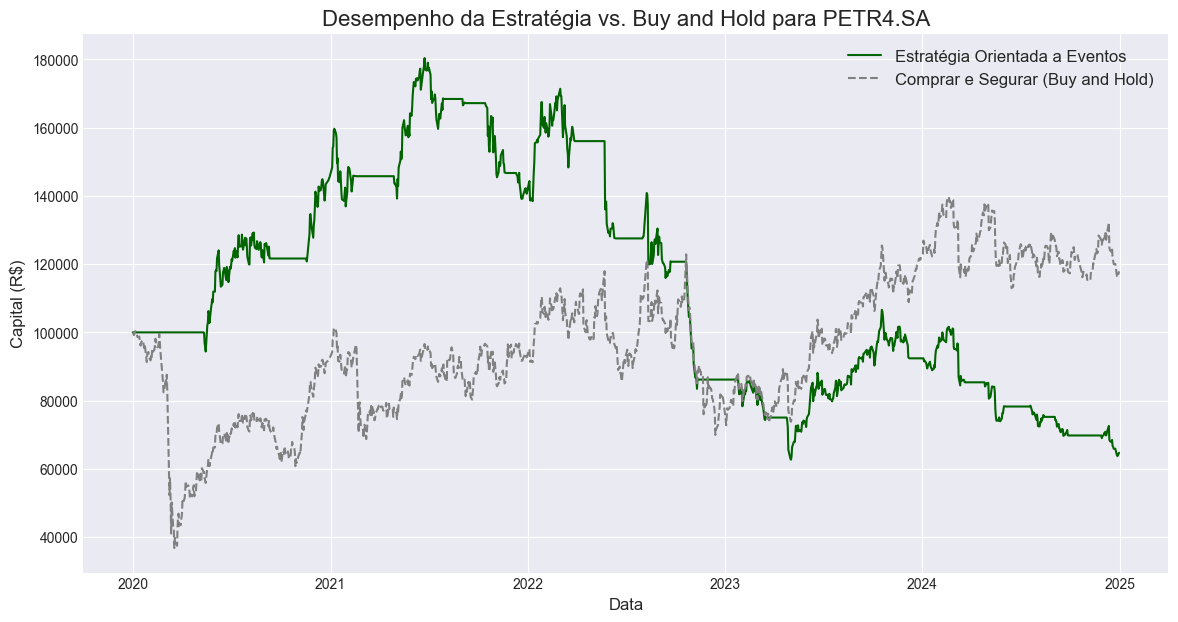

CPU times: total: 1.03 s
Wall time: 1.09 s


In [ ]:
%%time
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import queue
from datetime import datetime

# --- 1. Classes de Eventos ---
# Representam cada tipo de informação que flui pelo sistema.

class Event:
    """ Classe base para todos os eventos. """
    pass

class MarketEvent(Event):
    """ Sinaliza que um novo dado de mercado (barra) está disponível. """
    def __init__(self):
        self.type = 'MARKET'

class SignalEvent(Event):
    """ Representa a decisão da Estratégia (comprar ou vender). """
    def __init__(self, symbol, datetime, signal_type, strength=1.0):
        self.type = 'SIGNAL'
        self.symbol = symbol
        self.datetime = datetime
        self.signal_type = signal_type # 'LONG' ou 'EXIT'
        self.strength = strength

class OrderEvent(Event):
    """ Representa o envio de uma ordem para a corretora. """
    def __init__(self, symbol, order_type, quantity, direction):
        self.type = 'ORDER'
        self.symbol = symbol
        self.order_type = order_type # 'MKT' (a mercado)
        self.quantity = quantity
        self.direction = direction # 'BUY' ou 'SELL'

class FillEvent(Event):
    """ Representa a confirmação de que uma ordem foi executada. """
    def __init__(self, timeindex, symbol, exchange, quantity, direction, fill_cost, commission):
        self.type = 'FILL'
        self.timeindex = timeindex
        self.symbol = symbol
        self.exchange = exchange
        self.quantity = quantity
        self.direction = direction
        self.fill_cost = fill_cost
        self.commission = commission

# --- 2. Componentes do Backtester ---

class DataHandler:
    """
    Gerencia os dados históricos, fornecendo-os barra a barra para
    simular um feed de dados em tempo real.
    """
    def __init__(self, events, symbol_list, start_date, end_date):
        self.events = events
        self.symbol_list = symbol_list
        self.start_date = start_date
        self.end_date = end_date
        self.symbol_data = {}
        self.latest_symbol_data = {}
        self.continue_backtest = True
        self._download_data()
        self._data_stream = self._stream_bars()

    def _download_data(self):
        """
        Baixa os dados do Yahoo Finance
        """
        print("Baixando dados...")
        data = yf.download(self.symbol_list, start=self.start_date, end=self.end_date, auto_adjust=False, progress=False)

        if isinstance(data.columns, pd.MultiIndex):
            data.columns = ['_'.join(col).strip().lower() for col in data.columns.values]
        else:
            data.columns = [col.lower() for col in data.columns]

        for symbol in self.symbol_list:
            symbol_lower = symbol.lower()
            symbol_cols = {col: col.replace(f"_{symbol_lower}", "") for col in data.columns if symbol_lower in col}
            
            df_symbol = data[list(symbol_cols.keys())].copy()
            df_symbol.rename(columns=symbol_cols, inplace=True)
            self.symbol_data[symbol] = df_symbol

        print("Dados baixados com sucesso!")


    def _stream_bars(self):
        """Cria um gerador para fornecer os dados barra a barra."""
        comb_index = pd.DatetimeIndex([])
        for df in self.symbol_data.values():
            comb_index = comb_index.union(df.index)
        
        comb_index = comb_index.sort_values()
        
        for dt in comb_index:
            row_data = {}
            for symbol in self.symbol_list:
                try:
                    row_data[symbol] = self.symbol_data[symbol].loc[dt]
                except KeyError:
                    pass
            yield dt, row_data

    def get_latest_bars(self, symbol, N=1):
        """Retorna as últimas N barras para um dado símbolo."""
        try:
            return self.latest_symbol_data[symbol][-N:]
        except (KeyError, IndexError):
            return []

    def update_bars(self):
        """Avança para a próxima barra de dados e coloca um MarketEvent na fila."""
        try:
            dt, row_data = next(self._data_stream)
        except StopIteration:
            self.continue_backtest = False
            return
        
        for symbol, data in row_data.items():
            self.latest_symbol_data.setdefault(symbol, []).append(data)
        
        self.events.put(MarketEvent())


class Strategy:
    """ Gera sinais de negociação com base nos dados de mercado. """
    def __init__(self, data, events, symbol, short_window=21, long_window=50):
        self.data = data
        self.events = events
        self.symbol = symbol
        self.short_window = short_window
        self.long_window = long_window
        self.bought = False

    def calculate_signals(self, event):
        """Calcula as médias móveis e gera um sinal se houver um cruzamento."""
        if event.type == 'MARKET':
            bars = self.data.get_latest_bars(self.symbol, N=self.long_window)
            if len(bars) == self.long_window:
                closes = pd.Series([b['close'] for b in bars])
                short_sma = closes.rolling(window=self.short_window).mean().iloc[-1]
                long_sma = closes.rolling(window=self.long_window).mean().iloc[-1]

                dt = self.data.get_latest_bars(self.symbol)[-1].name
                
                if short_sma > long_sma and not self.bought:
                    signal = SignalEvent(self.symbol, dt, 'LONG')
                    self.events.put(signal)
                    self.bought = True
                elif short_sma < long_sma and self.bought:
                    signal = SignalEvent(self.symbol, dt, 'EXIT')
                    self.events.put(signal)
                    self.bought = False


class Portfolio:
    """ Gerencia as posições, o capital e gera as ordens de negociação. """
    def __init__(self, data, events, start_date, initial_capital=100000.0):
        self.data = data
        self.events = events
        self.start_date = start_date
        self.initial_capital = initial_capital
        
        self.current_positions = {symbol: 0.0 for symbol in self.data.symbol_list}
        self.current_holdings = {'cash': initial_capital, 'commission': 0.0, 'total': initial_capital}
        
        self.all_holdings = [{'datetime': pd.to_datetime(start_date), 'total': initial_capital}]

    def update_timeindex(self, event):
        """Atualiza o valor total do portfólio a cada nova barra de mercado."""
        try:
            latest_dt = self.data.get_latest_bars(self.data.symbol_list[0])[-1].name
        except IndexError:
            return 
        
        market_value = 0.0
        for symbol, quantity in self.current_positions.items():
            try:
                market_value += quantity * self.data.get_latest_bars(symbol)[-1]['close']
            except IndexError:
                pass
                
        self.current_holdings['total'] = self.current_holdings['cash'] + market_value
        self.all_holdings.append({'datetime': latest_dt, 'total': self.current_holdings['total']})
        
    def on_signal(self, event):
        """Recebe um Sinal e o converte em uma Ordem."""
        if event.type == 'SIGNAL':
            if event.signal_type == 'LONG' and self.current_positions[event.symbol] == 0:
                target_value = self.current_holdings['total']
                close_price = self.data.get_latest_bars(event.symbol)[-1]['close']
                if close_price > 0:
                    target_quantity = int(target_value / close_price)
                    order = OrderEvent(event.symbol, 'MKT', target_quantity, 'BUY')
                    self.events.put(order)
            elif event.signal_type == 'EXIT':
                current_quantity = self.current_positions[event.symbol]
                if current_quantity > 0:
                    order = OrderEvent(event.symbol, 'MKT', current_quantity, 'SELL')
                    self.events.put(order)
    
    def on_fill(self, event):
        """Recebe a confirmação da ordem (Fill) e atualiza o estado do portfólio."""
        if event.type == 'FILL':
            self.current_holdings['commission'] += event.commission
            if event.direction == 'BUY':
                self.current_positions[event.symbol] += event.quantity
                self.current_holdings['cash'] -= (event.fill_cost * event.quantity + event.commission)
            elif event.direction == 'SELL':
                self.current_positions[event.symbol] -= event.quantity
                self.current_holdings['cash'] += (event.fill_cost * event.quantity - event.commission)


class ExecutionHandler:
    """Simula a corretora, executando ordens e calculando custos."""
    def __init__(self, data, events, commission_rate=0.001):
        self.data = data
        self.events = events
        self.commission_rate = commission_rate

    def execute_order(self, event):
        """Simplesmente executa a ordem ao preço de mercado atual."""
        if event.type == 'ORDER' and event.quantity > 0:
            fill_cost = self.data.get_latest_bars(event.symbol)[-1]['close']
            commission = self.commission_rate * event.quantity * fill_cost
            fill_event = FillEvent(
                datetime.now(), event.symbol, 'B3', event.quantity, 
                event.direction, fill_cost, commission
            )
            self.events.put(fill_event)

# --- 3. Execução do Backtest ---

if __name__ == "__main__":
    # Configurações do backtest
    symbol_list = ['PETR4.SA']
    start_date = '2020-01-01'
    end_date = '2024-12-31'
    initial_capital = 100000.0

    # Instanciando os componentes
    events = queue.Queue()
    data = DataHandler(events, symbol_list, start_date, end_date)
    strategy = Strategy(data, events, symbol_list[0])
    portfolio = Portfolio(data, events, start_date, initial_capital)
    broker = ExecutionHandler(data, events)

    print("\nIniciando simulação do backtest (Orientado a Eventos)...")

    while True:
        data.update_bars()
        if not data.continue_backtest:
            break

        while True:
            try:
                event = events.get(block=False)
            except queue.Empty:
                break
            else:
                if event.type == 'MARKET':
                    strategy.calculate_signals(event)
                    portfolio.update_timeindex(event)
                elif event.type == 'SIGNAL':
                    print(f"SINAL: {event.signal_type} para {event.symbol} em {event.datetime.date()}")
                    portfolio.on_signal(event)
                elif event.type == 'ORDER':
                    broker.execute_order(event)
                elif event.type == 'FILL':
                    print(f"  > ORDEM EXECUTADA: {event.direction} {event.quantity} ações de {event.symbol} a R${event.fill_cost:.2f}")
                    portfolio.on_fill(event)

    print("\nSimulação concluída!")
    
    # --- 4. Análise de Resultados ---
    
    print("\n--- RESULTADOS FINAIS ---")
    print(f"Período Analisado: {start_date} a {end_date}")
    
    # --- Cálculo da Estratégia ---
    performance_df = pd.DataFrame(portfolio.all_holdings).set_index('datetime')
    capital_final_estrategia = performance_df['total'].iloc[-1]
    retorno_total_estrategia = (capital_final_estrategia / initial_capital - 1) * 100
    
    print("\nEstratégia Orientada a Eventos:")
    print(f"  - Capital Final: R${capital_final_estrategia:,.2f}")
    print(f"  - Retorno Total: {retorno_total_estrategia:.2f}%")
    
    # --- Cálculo do Buy and Hold ---
    # Usamos o DataFrame original, sem modificações, para o cálculo do Buy and Hold
    buy_and_hold_df = data.symbol_data[symbol_list[0]].copy()
    
    # Pega o primeiro e o último preço do período completo
    preco_inicial_bh = buy_and_hold_df['close'].iloc[0]
    preco_final_bh = buy_and_hold_df['close'].iloc[-1]
    
    capital_final_buyhold = (preco_final_bh / preco_inicial_bh) * initial_capital
    retorno_total_buyhold = (capital_final_buyhold / initial_capital - 1) * 100

    print("\nEstratégia Comprar e Segurar (Buy and Hold):")
    print(f"  - Capital Final: R${capital_final_buyhold:,.2f}")
    print(f"  - Retorno Total: {retorno_total_buyhold:.2f}%")

    # --- 5. Visualização Gráfica ---
    
    # Cria a curva de capital diária para o Buy and Hold para o gráfico
    curva_buy_and_hold = (buy_and_hold_df['close'] / preco_inicial_bh) * initial_capital
    
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 7))
    
    # Plota a curva da estratégia (que pode ter menos pontos)
    plt.plot(performance_df['total'], label='Estratégia Orientada a Eventos', color='darkgreen')
    
    # Plota a curva diária do Buy and Hold
    plt.plot(curva_buy_and_hold, label='Comprar e Segurar (Buy and Hold)', color='gray', linestyle='--')
    
    plt.title(f'Desempenho da Estratégia vs. Buy and Hold para {symbol_list[0]}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Capital (R$)', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

Note que coloquei %%time em cada código, observe o output e veja a diferença entre os tempos de execução(você pode brincar com as datas do backtest, aumentando a janela de trading e vendo como a execução se comporta)! Ao executar as duas células vocês devem ter percebido que as estratégias deram retornos diferentes de acordo com os backtests, reflitam um pouco sobre o porquê disto ter ocorrido e escrevam abaixo! Além disso, tentem corrigir possíveis erros que causaram essa divergência caso queira.

A divergência ocorre porque o Backtest Vetorizado aplica corretamente um .shift(1), executando a ordem no dia seguinte ao sinal. O Backtest Orientado a Eventos, neste exemplo simplificado, executa a ordem no mesmo instante do sinal (Preço de Fechamento do dia atual), criando um Viés de Antecipação (Look-ahead Bias) que infla artificialmente o retorno.  


### Seção 1: Fundamentos da Mensuração de Retorno e Risco de Cauda

A avaliação rigorosa de estratégias de investimento é a pedra angular da pesquisa quantitativa. Antes de mergulhar em métricas complexas de ajuste de risco, é imperativo estabelecer uma base sólida sobre como os retornos são definidos e como as perdas mais severas são quantificadas. Esta seção aborda os blocos de construção fundamentais: a distinção crítica entre retornos lineares e logarítmicos, a visualização da trajetória de riqueza através do retorno acumulado e a medida da dor do investidor através do drawdown.

#### 1.2 Trajetória de Riqueza: Retorno Acumulado (Cumulative Return)

A métrica mais fundamental para visualizar a performance de uma estratégia ao longo do tempo é o retorno acumulado. Ele representa o crescimento total de um investimento inicial, assumindo que todos os lucros são reinvestidos. Matematicamente, o retorno acumulado ($CR_T$) ao final de $T$ períodos é o produto dos fatores de crescimento de cada período.

$$
CR_T = \left[ \prod_{t=1}^{T} (1 + r_t) \right] - 1
$$

O gráfico do valor de um portfólio ao longo do tempo, frequentemente chamado de curva de capital ou curva de patrimônio, é a representação visual do retorno acumulado. A inclinação da curva indica a taxa de crescimento dos retornos, enquanto sua volatilidade e seus declínios representam o risco inerente à estratégia. É a primeira e mais importante ferramenta de diagnóstico para qualquer análise de performance.

#### 1.3 Drawdown e Maximum Drawdown (MDD): A Medida da Dor

Enquanto o retorno acumulado mostra o crescimento, o drawdown mede a dor. Um drawdown é uma medida da queda de um portfólio a partir de um pico anterior. Formalmente, o valor do portfólio em um tempo $t$ é $V(t)$. O pico histórico (running maximum) até o tempo $t$ é $M(t) = \max_{0 \le \tau \le t} V(\tau)$. O drawdown em $t$, $D(t)$, é a queda percentual a partir desse pico.

$$D(t) = \frac{M(t) - V(t)}{M(t)}$$

O **Maximum Drawdown (MDD)** é simplesmente o maior valor que o drawdown atingiu durante todo o período de análise: $MDD = \max_{t} D(t)$. Ele responde à pergunta direta e crucial: "Qual foi a maior perda percentual de pico a vale que um investidor teria sofrido ao investir nesta estratégia?".

A relevância do MDD transcende a pura estatística. Ele é uma proxy para a dor financeira e psicológica máxima experimentada por um investidor. Grandes drawdowns são a principal causa de resgates de capital, o que pode forçar um gestor a liquidar posições em momentos desfavoráveis, cristalizando perdas e destruindo o potencial de recuperação da estratégia. Giuseppe Paleologo, em sua obra, enfatiza que a gestão de drawdowns e o controle do risco de cauda são pilares para a construção de um negócio de investimentos sustentável e resiliente.

O MDD pode ser interpretado como uma medida de risco de cauda "realizada" e não-paramétrica. Ao contrário de métricas como a volatilidade, que assume simetria, ou o Value at Risk (VaR), que depende de um modelo de distribuição e de um nível de confiança, o MDD não faz premissas sobre a distribuição dos retornos. Ele simplesmente relata o pior evento que ocorreu na amostra histórica. Isso o torna um poderoso teste de realidade para modelos de risco que podem subestimar a probabilidade ou a magnitude de eventos extremos.

Contudo, sua maior força é também sua maior fraqueza: ele é uma medida *in-sample*. O MDD futuro de uma estratégia pode, e frequentemente irá, exceder seu MDD histórico. Essa limitação levou ao desenvolvimento de métricas mais robustas, como o **Conditional Expected Drawdown (CED)**, que utiliza técnicas de reamostragem como o bootstrap para estimar a distribuição completa dos possíveis drawdowns, fornecendo uma visão mais completa do risco futuro em vez de depender de um único evento passado.

### Seção 2: Métricas Clássicas de Risco-Retorno e Suas Limitações Intrínsecas

Após estabelecer os fundamentos da mensuração de retornos e perdas, a análise quantitativa avança para métricas que buscam avaliar o retorno em relação ao risco assumido. Esta seção disseca as métricas clássicas, como os ratios de Sharpe, Sortino e Calmar, destacando não apenas suas definições, mas também suas premissas subjacentes e, crucialmente, suas limitações em cenários de finanças do mundo real, onde as distribuições de retornos raramente são normais.

#### 2.1 O Sharpe Ratio no Framework de Otimização de Paleologo

O Sharpe Ratio é, sem dúvida, a medida de performance ajustada ao risco mais onipresente na indústria financeira. Sua definição clássica é a razão entre o excesso de retorno médio de um portfólio sobre a taxa livre de risco e o desvio padrão (volatilidade) de seus retornos.

$$SR = \frac{E}{\sigma_p}$$

Onde $E$ é o retorno esperado do portfólio, $R_f$ é a taxa livre de risco e $\sigma_p$ é o desvio padrão dos retornos do portfólio. Intuitivamente, ele mede o retorno adicional obtido por unidade de risco (volatilidade) assumida.

No entanto, a perspectiva de Giuseppe Paleologo eleva o Sharpe Ratio de uma simples métrica de avaliação para o cerne da otimização de portfólio. Em seu framework, a maximização do Sharpe Ratio é matematicamente equivalente ao problema fundamental do gestor de portfólio: maximizar o P&L esperado, sujeito a um orçamento de risco. Consideremos um vetor de retornos esperados (alphas), $\alpha$, e uma matriz de covariância (modelo de risco), $\Omega$. O problema de maximizar o Sharpe Ratio de um portfólio com pesos $w$ pode ser formulado como:

$$\max_{w} \frac{\alpha'w}{\sqrt{w'\Omega w}}$$

Paleologo demonstra que este problema, que é homogêneo de grau zero (ou seja, o ratio não muda se escalarmos o portfólio por um fator $t > 0$), pode ser tornado bem-posto ao se fixar o denominador (o risco). Isso o torna equivalente ao problema de maximizar o P&L esperado, $\alpha'w$, sujeito a uma restrição de volatilidade máxima, $w'\Omega w \le \sigma_{max}^2$.

Essa formulação revela a verdadeira essência do Sharpe Ratio no contexto quantitativo: ele é a ponte que une intrinsecamente o modelo de alpha (a fonte de retorno) e o modelo de risco (a matriz de covariância). A otimização do Sharpe Ratio é o processo matemático que encontra a alocação de capital ($w$) que traduz da forma mais eficiente possível as "ideias" de investimento (o vetor $\alpha$) em "lucro ajustado ao risco". Portanto, o Sharpe Ratio não é apenas uma nota de performance post-factum; ele representa a eficiência da conversão de previsão em resultado.

#### 2.2 A Crítica à Normalidade: Desconstruindo o Sharpe Ratio

A elegância e a utilidade do Sharpe Ratio no framework de média-variância dependem de uma premissa fundamental e frequentemente violada: que os retornos dos ativos seguem uma distribuição normal ou que a função de utilidade do investidor é quadrática. No mundo real, as distribuições de retorno, especialmente para estratégias de hedge funds e outras alternativas, exibem assimetria (skewness) e curtose (caudas pesadas), tornando o desvio padrão uma medida inadequada e incompleta de risco.

Quando a normalidade não se sustenta, o Sharpe Ratio pode ser perigosamente enganoso. Uma estratégia que gera muitos pequenos ganhos e perdas catastróficas raras (assimetria negativa) pode exibir um Sharpe Ratio artificialmente alto por longos períodos, até que o evento de cauda ocorra e aniquile os retornos. A crítica vai além da interpretação; ela afeta a confiança estatística no próprio estimador do Sharpe Ratio.

O trabalho de Mertens (2002), referenciado em diversas fontes acadêmicas, mostra que a variância do estimador do Sharpe Ratio ($Var(\widehat{SR})$) depende não apenas do tamanho da amostra ($T$), mas também dos momentos de ordem superior da distribuição de retornos. A fórmula para a variância assintótica é:

$$
Var(\widehat{SR}) \approx \frac{1}{T} \left[ 1 - \gamma_3 \widehat{SR} + \frac{\gamma_4 - 1}{4} \widehat{SR}^2 \right]
$$

Onde $\gamma_3$ é a assimetria (skewness) e $\gamma_4$ é a curtose da distribuição de retornos. Esta fórmula é reveladora:
*   **Assimetria Negativa ($\gamma_3 < 0$):** O termo $-\gamma_3 SR$ se torna positivo, aumentando a variância do estimador. Isso significa que para estratégias com tendência a grandes perdas, a incerteza sobre o verdadeiro Sharpe Ratio é maior.
*   **Excesso de Curtose Positivo ($\gamma_4 > 3$):** O termo $\frac{\gamma_4 - 3}{4}SR^2$ se torna positivo, também aumentando a variância. Estratégias com "caudas pesadas" (maior probabilidade de eventos extremos) têm estimadores de Sharpe Ratio menos confiáveis.

Essa dependência matemática demonstra que comparar os Sharpe Ratios de duas estratégias sem considerar as propriedades de suas distribuições é como comparar maçãs e laranjas; um Sharpe de 1.5 de uma estratégia com assimetria negativa e alta curtose é muito menos confiável do que o mesmo valor de uma estratégia com retornos quase normais.

Para lidar com essa incerteza, foi proposto o **Probabilistic Sharpe Ratio (PSR)**. Em vez de focar no valor pontual, o PSR calcula a probabilidade de que o Sharpe Ratio "verdadeiro" da estratégia seja maior que um determinado nível de referência ($SR^*$), dadas as características estatísticas da amostra (incluindo assimetria e curtose). Isso transforma a avaliação de uma declaração determinística ("O Sharpe é 1.5") para uma declaração probabilística ("Há 95% de probabilidade de que o verdadeiro Sharpe seja maior que 1.0"), incorporando formalmente a incerteza na análise.

A tabela abaixo resume o impacto da não-normalidade na confiabilidade do Sharpe Ratio.

**Tabela 2: Impacto da Não-Normalidade no Sharpe Ratio**

| Propriedade Estatística | Impacto na $Var(\widehat{SR})$ | Implicação para a Confiança | Alternativa Recomendada |
| :--- | :--- | :--- | :--- |
| Assimetria Negativa ($\gamma_3 < 0$) | Aumenta | Reduz a confiança no estimador pontual. O Sharpe Ratio observado pode ser uma superestimação do valor verdadeiro e estável. | Sortino Ratio, Calmar Ratio, CVaR, Omega Ratio |
| Excesso de Curtose Positivo ($\gamma_4 > 3$) | Aumenta | Reduz a confiança no estimador pontual. A presença de caudas pesadas torna o desvio padrão uma medida de risco incompleta e o Sharpe Ratio menos informativo. | CVaR, Omega Ratio, análise de drawdown |

#### 2.3 Foco no Risco Adverso: O Sortino Ratio

O Sortino Ratio é uma modificação direta do Sharpe Ratio projetada para corrigir uma de suas falhas mais evidentes: o tratamento simétrico da volatilidade. O Sharpe Ratio penaliza uma estratégia tanto por grandes movimentos positivos quanto negativos, pois ambos aumentam o desvio padrão. No entanto, a maioria dos investidores não considera a volatilidade positiva (upside) como "risco". O Sortino Ratio aborda isso substituindo o desvio padrão total no denominador pela **downside deviation** (ou desvio padrão adverso), que mede a volatilidade apenas dos retornos que ficam abaixo de um nível mínimo aceitável.

A fórmula do Sortino Ratio é:

$$Sortino \ Ratio = \frac{E}{\sigma_d}$$

Onde $MAR$ é o *Minimum Acceptable Return* (Retorno Mínimo Aceitável), frequentemente definido como a taxa livre de risco ($R_f$), e $\sigma_d$ é a *downside deviation*. A definição formal de $\sigma_d$ é a raiz quadrada do segundo momento dos retornos abaixo do MAR:

$$\sigma_d = \sqrt{E}$$

Para uma distribuição contínua de retornos $f(r)$, a fórmula integral é:

$$\sigma_d = \sqrt{\int_{-\infty}^{MAR} (MAR - r)^2 f(r) dr}$$

Ao focar exclusivamente na volatilidade prejudicial, o Sortino Ratio fornece uma medida de retorno ajustado ao risco mais alinhada com a percepção de risco dos investidores. Uma estratégia com alta volatilidade positiva, mas baixa volatilidade negativa, será adequadamente recompensada pelo Sortino Ratio, enquanto seria indevidamente penalizada pelo Sharpe Ratio. É particularmente útil para avaliar estratégias com perfis de retorno assimétricos.

#### 2.4 A Relação entre Retorno e Recuperação: O Calmar Ratio

O Calmar Ratio estabelece uma ligação direta e intuitiva entre a capacidade de uma estratégia de gerar retornos e sua pior experiência de perda. Desenvolvido por Terry W. Young, ele é calculado dividindo-se o retorno anualizado composto (CAGR) pelo valor absoluto do Maximum Drawdown (MDD) histórico.

$$Calmar \ Ratio = \frac{Retorno \ Anualizado \ Composto}{|MDD|}$$

A interpretação é direta: o Calmar Ratio informa quanto retorno anualizado a estratégia gerou para cada unidade percentual de seu pior drawdown. Um ratio de 1.0 indica que o retorno anual foi igual à pior perda; um ratio de 2.0 indica que o retorno anual foi o dobro da pior perda. Valores mais altos são preferíveis, pois sugerem uma maior eficiência na geração de retornos em relação ao risco de perda extrema. Esta métrica é especialmente valorizada na avaliação de hedge funds e Commodity Trading Advisors (CTAs), onde o controle de drawdowns é um objetivo primário.

A principal limitação do Calmar Ratio é sua dependência de um único ponto de dados histórico: o MDD. Isso o torna altamente sensível a outliers e ao período de tempo específico analisado. Um período de mercado benigno pode resultar em um Calmar Ratio artificialmente alto, que não reflete o risco real da estratégia em condições de estresse. Portanto, embora útil por sua simplicidade e foco na dor do investidor, ele deve ser usado em conjunto com outras métricas que considerem a distribuição completa dos retornos.

### Seção 3: A Geração de Alpha: Métricas Relativas a um Benchmark

Enquanto as métricas da seção anterior avaliam a performance de forma absoluta ou em relação a uma taxa livre de risco, muitas estratégias de investimento, especialmente no mundo da gestão de ativos tradicional e fundamentalista, são avaliadas em relação a um benchmark de mercado (e.g., S&P 500). Esta seção explora as métricas projetadas para isolar e quantificar a "habilidade" do gestor, ou o "alpha", que é o retorno gerado acima e além do que poderia ser alcançado passivamente.

#### 3.1 Alpha de Jensen: Medindo a Habilidade Além do Risco Sistemático

O Alpha de Jensen, desenvolvido por Michael Jensen, foi uma das primeiras tentativas de criar uma medida de performance ajustada ao risco que isolasse a contribuição do gestor. A métrica é derivada diretamente do Capital Asset Pricing Model (CAPM), que postula que o retorno esperado de um ativo é uma função de seu risco sistemático, medido pelo beta ($\beta$).

O Alpha de Jensen ($\alpha_J$) é definido como o excesso de retorno realizado de um portfólio em relação ao seu retorno esperado, conforme previsto pelo CAPM.

$$\alpha_J = R_p - [R_f + \beta_p(R_m - R_f)]$$

Onde:
*   $R_p$ é o retorno realizado do portfólio.
*   $R_f$ é a taxa livre de risco.
*   $\beta_p$ é o beta do portfólio em relação ao mercado.
*   $R_m$ é o retorno realizado do mercado.

A interpretação é que um $\alpha_J$ positivo indica que o gestor gerou retornos superiores aos que seriam justificados apenas pela exposição do portfólio ao risco de mercado (beta). É, portanto, frequentemente considerado uma medida da habilidade de seleção de ativos (*stock picking*) do gestor.

No entanto, para um público quantitativo, a validade do Alpha de Jensen é inseparável da validade do próprio CAPM. O CAPM se baseia em um conjunto de premissas altamente irrealistas, como mercados perfeitamente eficientes, ausência de custos de transação ou impostos, investidores com expectativas homogêneas e, o mais crítico, a suposição de que todo o risco relevante de um portfólio pode ser resumido por um único fator: seu beta de mercado.[25, 27] A pesquisa em finanças demonstrou extensivamente que outros fatores (e.g., valor, tamanho, momento, qualidade) também explicam os retornos dos ativos. Consequentemente, o Alpha de Jensen pode simplesmente estar capturando a exposição a esses outros fatores de risco não incluídos no modelo CAPM, em vez de uma verdadeira habilidade do gestor.

#### 3.2 O Information Ratio (IR) e a Decomposição de Paleologo

O Information Ratio (IR) é a principal medida de performance ajustada ao risco para estratégias que são gerenciadas em relação a um benchmark. Ele mede o excesso de retorno do gestor (alpha) por unidade de risco assumido em relação ao benchmark (tracking error).

A definição padrão é:

$$IR = \frac{E}{\sigma(R_p - R_b)} = \frac{\text{Alpha}}{\text{Tracking Error}}$$

Onde $R_b$ é o retorno do benchmark e $\sigma(R_p - R_b)$ é o desvio padrão da série de retornos ativos (diferença entre o portfólio e o benchmark). Um IR mais alto indica uma maior consistência na geração de alpha.

O trabalho de Giuseppe Paleologo oferece uma contribuição significativa ao ir além dessa definição monolítica, apresentando uma decomposição exata do Information Ratio que permite diagnosticar as fontes da performance de um gestor. Esta decomposição separa a habilidade de seleção de ativos da habilidade de dimensionamento das posições. A fórmula proposta por Paleologo é:

$$\text{IR} = \text{Habilidade de Seleção} \times \text{Amplitude} + \text{Habilidade de Dimensionamento}$$

Vamos analisar cada componente:
*   **Habilidade de Seleção (Selection Skill):** Mede a capacidade intrínseca do gestor de escolher ativos que superam o benchmark, independentemente do capital alocado a eles. É uma medida pura da qualidade das "ideias" de investimento.
*   **Amplitude (Breadth):** Tradicionalmente, a amplitude era aproximada pela raiz quadrada do número de apostas independentes ($N$). Paleologo propõe uma medida mais intuitiva e precisa baseada na concentração do portfólio. A amplitude é definida como a inversa do **Índice de Herfindahl** ($H = \sum w_i^2$), onde $w_i$ são os pesos ativos. Um portfólio altamente concentrado tem um $H$ alto e, portanto, uma amplitude baixa. Um portfólio mais diversificado tem um $H$ baixo e uma amplitude alta. A fórmula mostra que uma maior amplitude magnifica o impacto da habilidade de seleção no IR total.
*   **Habilidade de Dimensionamento (Sizing Skill):** Este termo mede a capacidade do gestor de alocar mais capital às suas melhores ideias (aquelas que acabam gerando o maior alpha) e menos capital às suas piores ideias. Matematicamente, é uma medida da correlação entre os pesos ativos das posições e seus retornos idiossincráticos realizados.

Esta decomposição transforma o IR de uma simples nota de avaliação em uma poderosa ferramenta de diagnóstico. Um gestor ou um alocador de capital pode usar esta fórmula para entender as verdadeiras fontes de performance. Por exemplo:
*   **Cenário A:** Um gestor exibe alta habilidade de seleção, mas habilidade de dimensionamento negativa. Isso significa que suas ideias são boas, mas ele consistentemente aloca mais capital às suas piores escolhas. O feedback quantitativo é claro: o processo de geração de alpha é sólido, mas o processo de construção de portfólio e dimensionamento de posições precisa ser revisto.
*   **Cenário B:** O gestor tem baixa habilidade de seleção, mas alta habilidade de dimensionamento. Ele é eficaz em alocar capital, mas suas ideias de base são fracas. O foco da melhoria deve ser no processo de pesquisa e geração de alpha.

Ao fornecer um feedback loop quantitativo, a decomposição de Paleologo alinha-se perfeitamente com a filosofia de medição e otimização contínua que define a pesquisa quantitativa. Além disso, a decomposição pode ser estendida para analisar os lados *long* e *short* de uma estratégia separadamente, ajudando a explicar o fenômeno empírico de que o alpha idiossincrático do lado *long* é frequentemente maior do que o do lado *short*.

### Seção 4: Ferramentas Avançadas para Análise de Risco e Distribuições Complexas

As métricas clássicas, mesmo com suas modificações, muitas vezes falham em capturar a natureza complexa do risco, especialmente o risco de cauda (tail risk) presente em distribuições não-normais. Esta seção introduz um conjunto de ferramentas mais avançadas, projetadas especificamente para quantificar o risco de perdas extremas e para avaliar a performance considerando a distribuição de retornos em sua totalidade, movendo a análise para além dos dois primeiros momentos (média e variância).

#### 4.1 Quantificando o Risco de Cauda: Value at Risk (VaR) e Conditional Value at Risk (CVaR)

O **Value at Risk (VaR)** é uma medida de risco de cauda amplamente utilizada na indústria financeira e por reguladores. Ele responde à pergunta: "Qual é a perda máxima esperada em um determinado horizonte de tempo, para um dado nível de confiança?".[31] Formalmente, o VaR em um nível de confiança $\alpha$ é o quantil $(1-\alpha)$ da distribuição de perdas do portfólio. Por exemplo, um VaR de 1 milhão de reais a 99% de confiança para um dia significa que há uma probabilidade de 1% de que o portfólio perca mais de 1 milhão de reais no próximo dia.

Apesar de sua popularidade, o VaR possui duas limitações fundamentais:
1.  **Não informa sobre a magnitude da perda na cauda:** O VaR nos diz o ponto de corte, mas não oferece nenhuma informação sobre o quão ruim as perdas podem ser *se* esse limiar for ultrapassado.
2.  **Não é uma medida de risco "coerente":** O VaR não satisfaz a propriedade de subaditividade. Isso significa que o VaR de um portfólio diversificado pode, em alguns casos, ser maior do que a soma dos VaRs de seus componentes individuais. Isso é contraintuitivo e perigoso, pois pode desencorajar a diversificação, que é um dos princípios fundamentais da gestão de risco.

Para superar essas deficiências, foi desenvolvido o **Conditional Value at Risk (CVaR)**, também conhecido como *Expected Tail Loss* (ETL) ou *Expected Shortfall*. O CVaR responde a uma pergunta mais informativa: "Dado que a perda excedeu o VaR, qual é a perda média esperada?". Matematicamente, o CVaR é o valor esperado das perdas, condicionado ao fato de que a perda é maior que o VaR.

$$CVaR_\alpha = E[Perda | Perda > VaR_\alpha] $$

O CVaR é superior ao VaR por duas razões cruciais para a pesquisa quantitativa:
1.  **É uma medida de risco coerente:** O CVaR é subaditivo, o que significa que o risco de um portfólio diversificado é sempre menor ou igual à soma ponderada dos riscos de seus componentes, alinhando-se com os benefícios da diversificação.[33, 34]
2.  **É uma função convexa:** Esta propriedade matemática é de extrema importância prática. A convexidade do CVaR permite que ele seja utilizado como uma restrição ou como a própria função objetivo em problemas de otimização de portfólio. Tais problemas podem ser formulados como programas lineares e resolvidos de forma muito eficiente, mesmo para portfólios de grande escala. Isso representa uma vantagem computacional massiva sobre a otimização baseada em VaR, que é um problema não-convexo e muito mais difícil de resolver.

#### 4.2 Uma Visão Holística da Distribuição: O Omega Ratio (Ω)

Enquanto o Sortino Ratio e o CVaR melhoram a medição do risco de cauda, eles ainda focam em uma parte específica da distribuição. O **Omega Ratio (Ω)**, desenvolvido por Con Keating e William Shadwick em 2002, oferece uma abordagem mais holística, utilizando todas as informações contidas na distribuição de retornos para criar uma medida de performance.

O Omega Ratio é definido como a razão entre os ganhos ponderados pela probabilidade e as perdas ponderadas pela probabilidade, em relação a um determinado limiar de retorno $L$ (threshold). A definição matemática formal, para uma distribuição de retornos com função de distribuição cumulativa $F(r)$ definida no intervalo $[a, b]$, é:

$$\Omega(L) = \frac{\int_{L}^{b} (1 - F(r)) dr}{\int_{a}^{L} F(r) dr}$$

O numerador representa a área sob a curva de distribuição acima do limiar $L$ (a esperança dos ganhos acima de $L$), enquanto o denominador representa a área sob a curva de distribuição abaixo do limiar $L$ (a esperança das perdas abaixo de $L$). Um valor de $\Omega(L)$ mais alto é sempre preferível.

A grande vantagem do Omega Ratio é que ele captura nativamente todos os momentos da distribuição (média, variância, assimetria, curtose, etc.) sem a necessidade de estimá-los individualmente. Ao traçar o valor de $\Omega(L)$ para uma gama de limiares $L$, obtém-se uma "curva Omega". Se a curva Omega de uma estratégia A estiver consistentemente acima da curva de uma estratégia B para todos os níveis de $L$ de interesse, pode-se dizer que A domina B em termos de risco-retorno.

Essa característica torna o Omega Ratio uma ferramenta excepcionalmente poderosa para comparar estratégias com perfis de retorno não-normais e complexos, como as de hedge funds. Ele evita as armadilhas de métricas baseadas em momentos, que podem ser enganosas na presença de assimetria e caudas pesadas, fornecendo uma classificação de performance mais robusta e completa.

### Seção 5: Síntese e Aplicação no Framework de um Pesquisador Quant

A análise detalhada das diversas métricas de performance e risco revela que não existe uma "bala de prata". Cada métrica oferece uma perspectiva única, com suas próprias forças e fraquezas. A verdadeira maestria de um pesquisador quantitativo reside não no uso de uma única métrica, mas na síntese inteligente de um conjunto delas para formar uma visão completa e robusta da performance de uma estratégia.

#### 5.1 Construindo um Dashboard de Performance Robusto

Confiar em uma única métrica, como o Sharpe Ratio, é uma prática perigosa que pode levar a conclusões enganosas, especialmente com distribuições de retorno não-normais. Um dashboard de performance robusto deve ser multidimensional, cobrindo diferentes facetas da performance e do risco. A combinação das métricas discutidas neste relatório fornece um framework abrangente:

1.  **Performance Absoluta e Trajetória:** O **Retorno Acumulado** e o **Retorno Anualizado** fornecem a visão de nível mais alto sobre o crescimento do capital.
2.  **Risco de Cauda e Dor do Investidor:** O **Maximum Drawdown (MDD)**, o **Calmar Ratio** e o **Conditional Value at Risk (CVaR)** quantificam o risco de perdas extremas, que é frequentemente o fator mais crítico para a sobrevivência de uma estratégia a longo prazo.
3.  **Eficiência de Risco-Retorno:** O **Sharpe Ratio** (avaliado criticamente com o **Probabilistic Sharpe Ratio**), o **Sortino Ratio** e o **Omega Ratio** medem a eficiência com que uma estratégia converte risco em retorno, cada um com uma definição diferente e mais sofisticada de "risco".
4.  **Habilidade Relativa e Geração de Alpha:** O **Alpha de Jensen** e, mais importante, o **Information Ratio (decomposto por Paleologo)** avaliam a habilidade do gestor em gerar retornos acima de um benchmark, diagnosticando as fontes dessa performance.

A tabela a seguir consolida as características, usos e limitações de cada métrica, servindo como um guia de referência rápida.

**Tabela 1: Comparativo das Métricas de Performance**

| Métrica | Fórmula Matemática (Simplificada) | O Que Mede | Principal Caso de Uso | Limitação Fundamental |
| :--- | :--- | :--- | :--- | :--- |
| **Retorno Anualizado** | $CAGR = (\frac{V_{final}}{V_{inicial}})^{\frac{1}{N}} - 1$ | Taxa de crescimento geométrico anual. | Comparar performance de longo prazo entre estratégias. | Não ajustado ao risco. |
| **Maximum Drawdown (MDD)** | $\max \left(\frac{M(t) - V(t)}{M(t)}\right)$ | A maior perda percentual de pico a vale. | Medir a "dor" máxima e o risco de cauda realizado. | É uma medida *in-sample*; o MDD futuro pode ser maior. |
| **Sharpe Ratio** | $\frac{R_p - R_f}{\sigma_p}$ | Retorno em excesso por unidade de volatilidade total. | Avaliação inicial de performance ajustada ao risco. | Pressupõe normalidade; penaliza volatilidade positiva. |
| **Sortino Ratio** | $\frac{R_p - MAR}{\sigma_d}$ | Retorno em excesso por unidade de volatilidade negativa. | Avaliar estratégias com retornos assimétricos. | Foca apenas no segundo momento do risco de cauda. |
| **Calmar Ratio** | $\frac{CAGR}{MDD}$ | Retorno anualizado por unidade de drawdown máximo. | Avaliar retorno ajustado pelo risco de cauda extremo. | O MDD é um único ponto de dados histórico (pouco robusto). |
| **Alpha de Jensen** | $\alpha = R_p - [R_f + \beta(R_m - R_f)]$ | Excesso de retorno sobre o esperado pelo CAPM. | Medir a habilidade de *stock picking* em um modelo de fator único. | Tão válido quanto o próprio CAPM, que é irrealista. |
| **Information Ratio** | $\frac{R_p - R_b}{\sigma_{p-b}}$ | Retorno ativo por unidade de risco ativo (Tracking Error). | Diagnosticar a consistência do gestor em bater o benchmark. | Requer um benchmark relevante e bem definido. |
| **Conditional VaR (CVaR)** | $E[r \| r \leq VaR_\alpha]$ | A perda média esperada na cauda da distribuição (dado que o VaR foi rompido). | Medida de risco de cauda coerente; útil para otimização. | Requer um modelo para a cauda da distribuição. |
| **Omega Ratio** | $\frac{\int_{L}^{\infty} (1 - F(r)) dr}{\int_{-\infty}^{L} F(r) dr}$ | Razão entre ganhos e perdas ponderados pela probabilidade. | Avaliação holística que considera toda a distribuição de retornos. | Pode ser computacionalmente mais intensivo; menos intuitivo. |

#### 5.2 Seleção de Métricas por Tipo de Estratégia

A sofisticação na análise de performance não está em calcular todas as métricas possíveis, mas em selecionar o conjunto mais apropriado para o contexto da estratégia em questão. A natureza da distribuição de retornos e os objetivos do investidor devem ditar a escolha das ferramentas de avaliação.

*   Para uma **estratégia de venda de volatilidade** (e.g., venda de opções), que intrinsecamente possui retornos com forte assimetria negativa (muitos pequenos ganhos, perdas raras mas catastróficas), o Sharpe Ratio seria perigosamente enganoso. A avaliação deve se concentrar em métricas que capturem o risco de cauda, como o **Sortino Ratio**, o **Calmar Ratio**, o **CVaR** e o **Omega Ratio**.
*   Para uma **estratégia *long-only* de ações fundamentalista** gerenciada em relação a um benchmark como o S&P 500, o objetivo principal é gerar alpha. Portanto, o **Information Ratio** é a métrica central. Utilizar a **decomposição de Paleologo** é crucial para entender se o gestor agrega valor através da seleção de ações ou do dimensionamento de suas convicções.
*   Para uma **estratégia de alta frequência** que realiza milhares de pequenas apostas por dia, a distribuição de retornos pode se aproximar mais da normalidade, tornando o **Sharpe Ratio** uma medida mais defensável. No entanto, a análise de **custos de transação** e a **derrapagem (slippage)** tornam-se as métricas mais críticas para a viabilidade da estratégia.
*   Para um **fundo de macro global** que investe em diversas classes de ativos com distribuições de retorno muito diferentes, uma métrica como o **Omega Ratio** é ideal, pois permite uma comparação robusta entre ativos sem assumir uma forma distributiva específica para cada um.

Um pesquisador quantitativo deve, portanto, primeiro caracterizar a "impressão digital" estatística de sua estratégia e definir claramente seus objetivos para, então, selecionar o conjunto de métricas que fornecerá a avaliação mais informativa e honesta de sua performance.

### 6 Exploração do Sharpe Ratio

#### 6.1 Resultado teórico
O Sharpe Ratio também implica um limite para a probabilidade de se incorrer em uma determinada perda. Isso deriva da desigualdade de Cantelli. Para uma variável aleatória $\xi$ com média $\mu$ e desvio padrão $\sigma$, essa desigualdade afirma que:

$$P(\xi \le \mu - \lambda) \le \frac{\sigma^2}{\sigma^2 + \lambda^2}$$

Se $\xi$ é o retorno anual de uma estratégia, **SR** é o Sharpe Ratio anualizado da estratégia (ou seja, $SR = \mu / \sigma$), e a perda é expressa como um múltiplo de desvios padrão, $-L\sigma$ (onde L > 0), como os profissionais do mercado costumam fazer, então a desigualdade é transformada.

Estamos interessados na probabilidade de uma perda, $P(\xi \le -L\sigma)$. Para usar a desigualdade de Cantelli, definimos o evento $\mu - \lambda = -L\sigma$, o que nos dá $\lambda = \mu + L\sigma$. Substituindo $\mu = SR \cdot \sigma$, obtemos $\lambda = (SR + L)\sigma$.

Ao inserir esse valor de $\lambda$ de volta na desigualdade, obtemos a transformação final:

$$P(\xi \le -L\sigma) \le \frac{\sigma^2}{\sigma^2 + ((SR+L)\sigma)^2} = \frac{\sigma^2}{\sigma^2(1 + (SR+L)^2)} = \frac{1}{1 + (SR+L)^2}$$

$\xi$ = variável aleatória que representa o resultado real observado

μ = retorno médio esperado da sua estratégia.

λ =  um desvio da média. Nós o calculamos especificamente para definir o "ponto de perda" que queremos analisar e, assim, encontrar o limite máximo para a probabilidade de que essa perda ocorra.

#### 6.2 Dimensão do Sharpe Ratio e conversão temporal

O retorno, a volatilidade e o Índice de Sharpe dependem do horizonte de tempo sobre o qual são medidos. O retorno diário *r* é o P&L (Lucros e Perdas) diário sobre o capital; o retorno anualizado, onde assumimos o mesmo P&L diário ao longo de *T* dias de negociação em um ano, é *r* × *T*. Dizemos que os retornos têm a dimensão de $[\text{Tempo}]^{-1}$. Por exemplo, uma estratégia tem um retorno de 10%/(1 ano) = 10%/( *T* dias) = (10%/*T*)/dia.

Assumindo que os retornos não sejam serialmente correlacionados (ver Seção 2.1.5), a variância também é linear em relação ao tempo, pois a variância dos retornos ao longo de um ano é a soma das *T* variâncias diárias, então sua dimensão é $[\text{Tempo}]^{-1}$. A volatilidade é a raiz quadrada da variância e tem a dimensão de $[\text{Tempo}]^{-1/2}$.

O Índice de Sharpe tem a dimensão de [retorno]/[volatilidade], que é:

$$\frac{[\text{Tempo}]^{-1}}{[\text{Tempo}]^{-1/2}} = [\text{Tempo}]^{-1/2}$$

Ao converter o horizonte de um Índice de Sharpe para uma estratégia de ações de um horizonte diário para um mensal, multiplicamos o Índice de Sharpe diário por $\sqrt{21}$, onde 21 é o número aproximado de dias de negociação em um mês. O fator de conversão é, portanto, a raiz quadrada do número de períodos.

#### 6.3 Intervalo de confiança do Sharpe Ratio

Suponha que você observe *T* retornos consecutivos (ou P&L) e estime o Índice de Sharpe a partir desses dados. Qual é o intervalo de confiança para este estimador? Primeiro, o estimador do Índice de Sharpe é composto pela média amostral ($\hat{\mu}$) e pelo desvio padrão amostral ($\hat{\sigma}$):

$$\hat{\mu} := \frac{1}{T}\sum_{t=1}^{T} r_t \quad ; \quad \hat{\sigma} := \sqrt{\frac{1}{T}\sum_{t=1}^{T} (r_t - \hat{\mu})^2}$$
$$\hat{SR} := \frac{\hat{\mu}}{\hat{\sigma}}$$

Para retornos excedentes $r_t$ que são **i.i.d.** (independentes e identicamente distribuídos) e com variância finita, o estimador $\hat{SR}$ possui distribuição normal no limite $T \to \infty$, com um erro padrão (SE) de:

$$SE(\hat{SR}) = \sqrt{\frac{1}{T}\left(1 + \frac{SR^2}{2}\right)}$$

Um caso simplificado ocorre quando conhecemos antecipadamente o verdadeiro desvio padrão dos retornos, $\sigma$. O estimador do Índice de Sharpe é então $\hat{SR} := \hat{\mu}/\sigma$, e o erro padrão é simplesmente $\sqrt{1/T}$.

No caso de retornos autocorrelacionados com $Cor(r_s, r_t) = \rho^{|t-s|}$, o estimador do Índice de Sharpe pode ser ajustado. Para pequenos valores de $|\rho|$, o Índice de Sharpe ajustado pela autocorrelação é:

$$\hat{SR}_{adj} := \frac{\hat{\mu}}{\hat{\sigma}} \sqrt{\frac{1-\rho}{1+\rho}} \approx \frac{\hat{\mu}}{\hat{\sigma}}(1-\rho)$$

*(Esta fórmula final representa um ajuste no próprio valor do Índice de Sharpe para levar em conta a correlação serial, o que é diferente do cálculo do erro padrão do Índice de Sharpe não ajustado sob correlação.)*